# Gradient descent implementation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import time

In [2]:
#starting point
X = np.array([5, 5])

In [3]:
def rosenbrock(X):
    
    """
    X: Two dimensional array of x, y coordinates
    Returns: Value of rosenbrock function evaluated at x,y point
    """
    
    x, y = X[0], X[1]
    return (1-x)**2 + 100*(y-x**2)**2 ##global minimum at (a,a**2)

In [4]:
def gradient_rosenbrock(X):
    
    """
    X: Two dimensional array of x, y coordinates
    Returns: The partial derivatives of rosenbrock function at x,y
    """
    
    x, y = X[0], X[1]
    dx = -400*x*y + 400*x**3 + 2*x -2
    dy = 200*y -200*x**2
    return np.array([dx, dy])

In [5]:
def hessian_rosenbrock(X):
    
    """
    X: Two dimensional array of x, y coordinates
    Returns: The second order derivatives evaluated at x,y as hessian matrix
    """
        
    x, y = X[0], X[1]
    h11 = -400*y + 1200*x**2 + 2
    h12 = -400 * x
    h21 = -400 * x
    h22 = 200
    return np.array([[h11,h12], [h21,h22]])

In [6]:
def plot_rosenbrock(X_path, iterations, title, alpha):
    
    """
    X_path: Two dimentional matrix of x,y coordinates for each iteration
    iterations: Number of iteration steps
    title: string for plotting title
    alpha: learning rate chosen 
    Returns: a plot of rosenbrock function with optimisation path
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    fig.suptitle(title + " converges to minimum after: " + str(iterations) + " iterations" + ". With learning rate: " + str(alpha), fontsize = 20)

    x0 = np.linspace(-10, 10, 500) 
    y0 = np.linspace(-5, 10, 500)
    X0, Y0 = np.meshgrid(x0, y0)
    Z0 = (1-X0)**2 + 100*(Y0-X0**2)**2 

    x1 = np.linspace(-3, 3, 500) 
    y1 = np.linspace(-3, 3, 500)
    X1, Y1 = np.meshgrid(x1, y1)
    Z1 = (1-X1)**2 + 100*(Y1-X1**2)**2 

    ax[0].contour(X0, Y0, Z0, np.arange(10)**6, alpha=0.5, cmap='CMRmap')
    ax[1].contour(X1, Y1, Z1, np.arange(10)**6, alpha=0.5, cmap='CMRmap')
    ax[0].plot(np.array(X_path)[:,0],np.array(X_path)[:,1], marker='o', c='r')
    ax[1].plot(np.array(X_path)[:,0],np.array(X_path)[:,1], marker='o', c='r')
    ax[1].set_ylim(0,3)
    ax[1].set_xlim(0,3)
    ax[0].plot([1],[1], marker='X', c='b', markersize=12)
    ax[1].plot([1],[1], marker='X', c='b', markersize=12)
    ax[1].text(1.1, 1, "Optimum", size=12)
    plt.show()

In [7]:
def gradient_descent(alpha, epsilon, plot_title):
    
    """
    alpha: learning rate
    epsilon: value of function for early stopping
    plot_title: string for plotting
    """
    
    X_step = X
    X_func = rosenbrock(X)
    X_path = [X] 
    iteration = 0
    
    while X_func > epsilon:
        X_step = X_step - alpha * gradient_rosenbrock(X_step)
        X_func = rosenbrock(X_step)
        X_path.append(X_step)
        iteration += 1
        
        if iteration % 10000 == 0:
            print("Iterations: {}, Value: {}".format(iteration, X_func))
    
    plot_rosenbrock(X_path, iteration, plot_title, alpha)
    
    return X_step, X_func, X_path, iteration

In [8]:
def momentum(alpha, beta, epsilon, plot_title):
    
    """
    alpha: learning rate
    beta: momentum tuning parameter
    epsilon: value of function for early stopping
    plot_title: string for plotting
    """
    
    X_step = X
    X_func = rosenbrock(X)
    X_path = [X] 
    iteration = 0
    Z = np.array([0, 0])
    
    while X_func > epsilon:
        Z = beta * Z + alpha * gradient_rosenbrock(X_step)
        X_step = X_step - Z
        X_func = rosenbrock(X_step)
        X_path.append(X_step)
        iteration += 1
        
        if iteration % 10000 == 0:
            print("Iterations: {}, Value: {}".format(iteration, X_func))
    
    plot_rosenbrock(X_path, iteration, plot_title, alpha)
    
    return X_step, X_func, X_path, iteration  

In [9]:
def nesterov(alpha, beta, epsilon, plot_title):
    
    """
    alpha: learning rate
    beta: momentum tuning parameter
    epsilon: value of function for early stopping
    plot_title: string for plotting
    """
    
    X_step = X
    X_func = rosenbrock(X)
    X_path = [X] 
    iteration = 0
    Z = np.array([0, 0])
    
    while X_func > epsilon:
        Z = beta*Z
        X_prop = X_step - Z
        Z = Z + alpha * gradient_rosenbrock(X_prop)
        X_step = X_step - Z
        X_func = rosenbrock(X_step)
        X_path.append(X_step)
        iteration += 1
    
        if iteration % 10000 == 0:
            print("Iterations: {}, Value: {}".format(iteration, X_func))
    
    plot_rosenbrock(X_path, iteration, plot_title, alpha)
    
    return X_step, X_func, X_path, iteration  

In [10]:
def conj_grad_nl(max_iteration):

    """
    Reference for algorithm: An Introduction to the Conjugate Gradient Method Without the Agonizing Pain
    Page 52: Nonlinear Conjugate Gradients with Newton-Raphson and Fletcher-Reeves
    """

    X_path = [X] 
    X_step = X
    X_func = rosenbrock(X)

    i_max = max_iteration
    j_max = 100000
    i = 0
    k = 0
    r = - gradient_rosenbrock(X)
    d = r
    delta_new = np.dot(r.T,r)
    delta_zero = delta_new
    epsilon_CG = 0.000001
    epsilon_NR = 0.000001
    alpha = 0

    while i < i_max and delta_new > (epsilon_CG**2)*delta_zero:
        j = 0
        delta_d = np.dot(d.T,d)
        alpha = -(np.dot(gradient_rosenbrock(X_step).T,d))/(np.dot(np.dot(d.T, hessian_rosenbrock(X_step)),d))

        while j < j_max and (alpha**2) * delta_d > epsilon_NR**2:
            alpha = -(np.dot(gradient_rosenbrock(X_step).T,d))/(np.dot(np.dot(d.T, hessian_rosenbrock(X_step)),d))
            X_step = X_step + alpha*d
            j += 1

        r = - gradient_rosenbrock(X_step)
        delta_old = delta_new
        delta_new = np.dot(r.T,r)
        beta = delta_new/delta_old
        d = r + beta*d
        k += 1

        if k == 3 or np.dot(r.T,d) <= 0:
            d = r
            k = 0

        i += 1    

        X_func = rosenbrock(X_step)
        X_path.append(X_step)

        if i % 10 == 0:
                print("Iterations: {}, Value: {}".format(i, X_func))

    print("value of function is: " + str(X_func))
    plot_rosenbrock(X_path, i, "Non-linear Conjugate Gradient method", "")

#### Gradient Descent

Iterations: 10000, Value: 7.517709385892979
Iterations: 20000, Value: 3.459543686002352
Iterations: 30000, Value: 0.11810299765535831
Iterations: 40000, Value: 0.020256794634554445
Iterations: 50000, Value: 0.004913208216430647
Iterations: 60000, Value: 0.0013357966799341391


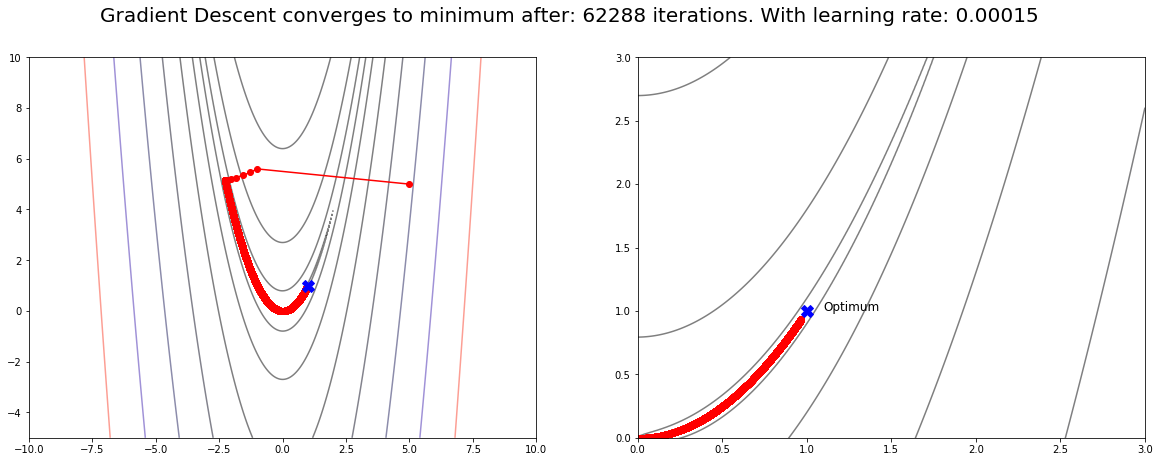

Time to converge 1227.7531623840332 ms


In [11]:
tic = time.time()
X_step, X_func, X_path, iteration = gradient_descent(0.00015, 0.001, "Gradient Descent")
toc = time.time()
print("Time to converge " +str(1000*(toc-tic)) + " ms")

#### Gradient descent with momentum

Iterations: 10000, Value: 0.047273581649967554


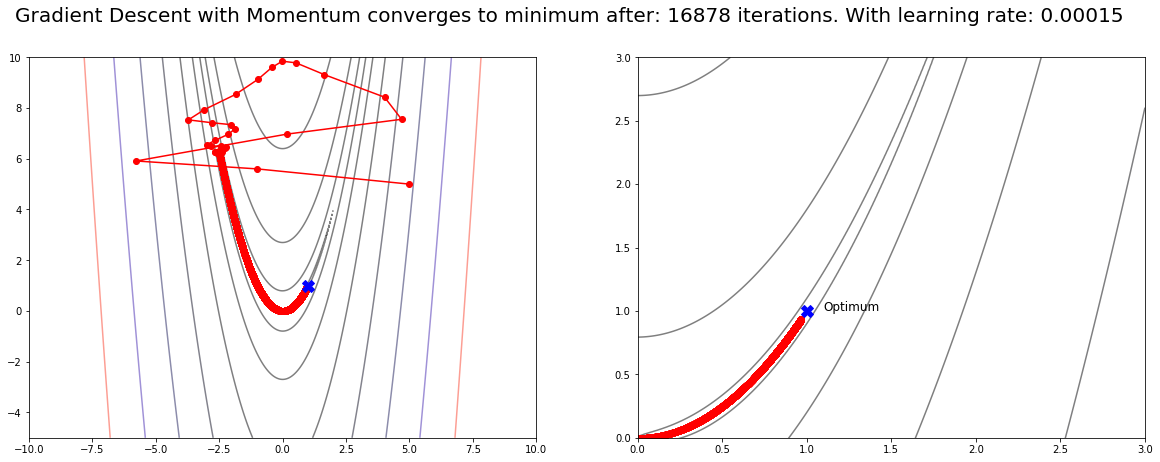

Time to converge 572.922945022583 ms


In [12]:
tic = time.time()
X_step, X_func, X_path, iteration = momentum(0.00015, 0.75, 0.001, "Gradient Descent with Momentum")
toc = time.time()
print("Time to converge " +str(1000*(toc-tic)) + " ms")

#### Nesterov's gradient descent

Iterations: 10000, Value: 6.987747697303906
Iterations: 20000, Value: 0.0049074859190356805


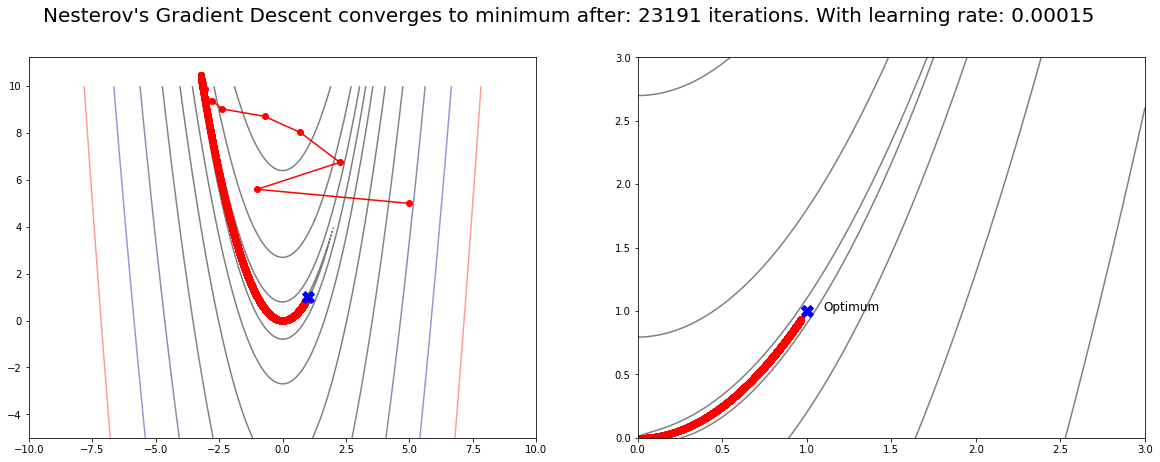

Time to converge 643.6738967895508 ms


In [13]:
tic = time.time()
X_step, X_func, X_path, iteration = nesterov(0.00015, 0.74, 0.001, "Nesterov's Gradient Descent")
toc = time.time()
print("Time to converge " +str(1000*(toc-tic)) + " ms")

#### Non-linear conjugate gradients 

Iterations: 10, Value: 0.3061619190207644
value of function is: 6.891875566601673e-07


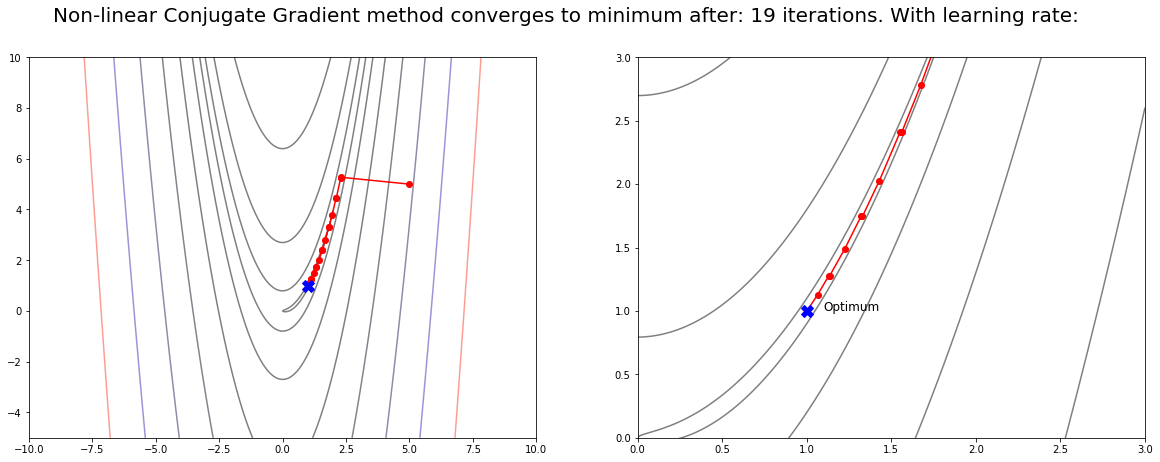

Time to converge 360.1222038269043 ms


In [14]:
tic = time.time()
conj_grad_nl(10000)
toc = time.time()
print("Time to converge " +str(1000*(toc-tic)) + " ms")